In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
DATASET_DIR = 'dataset/TMNIST_Alphabet.csv'

In [2]:
dataset_path = DATASET_DIR
df = pd.read_csv(dataset_path)
df.head(5)

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print(df['labels'].unique())
no_of_classes=df['labels'].nunique()
print('Number of classes are',no_of_classes)

['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']
Number of classes are 94


In [4]:
# dropping label columns 
X = df.drop(columns=['labels']) 
y = df['labels']

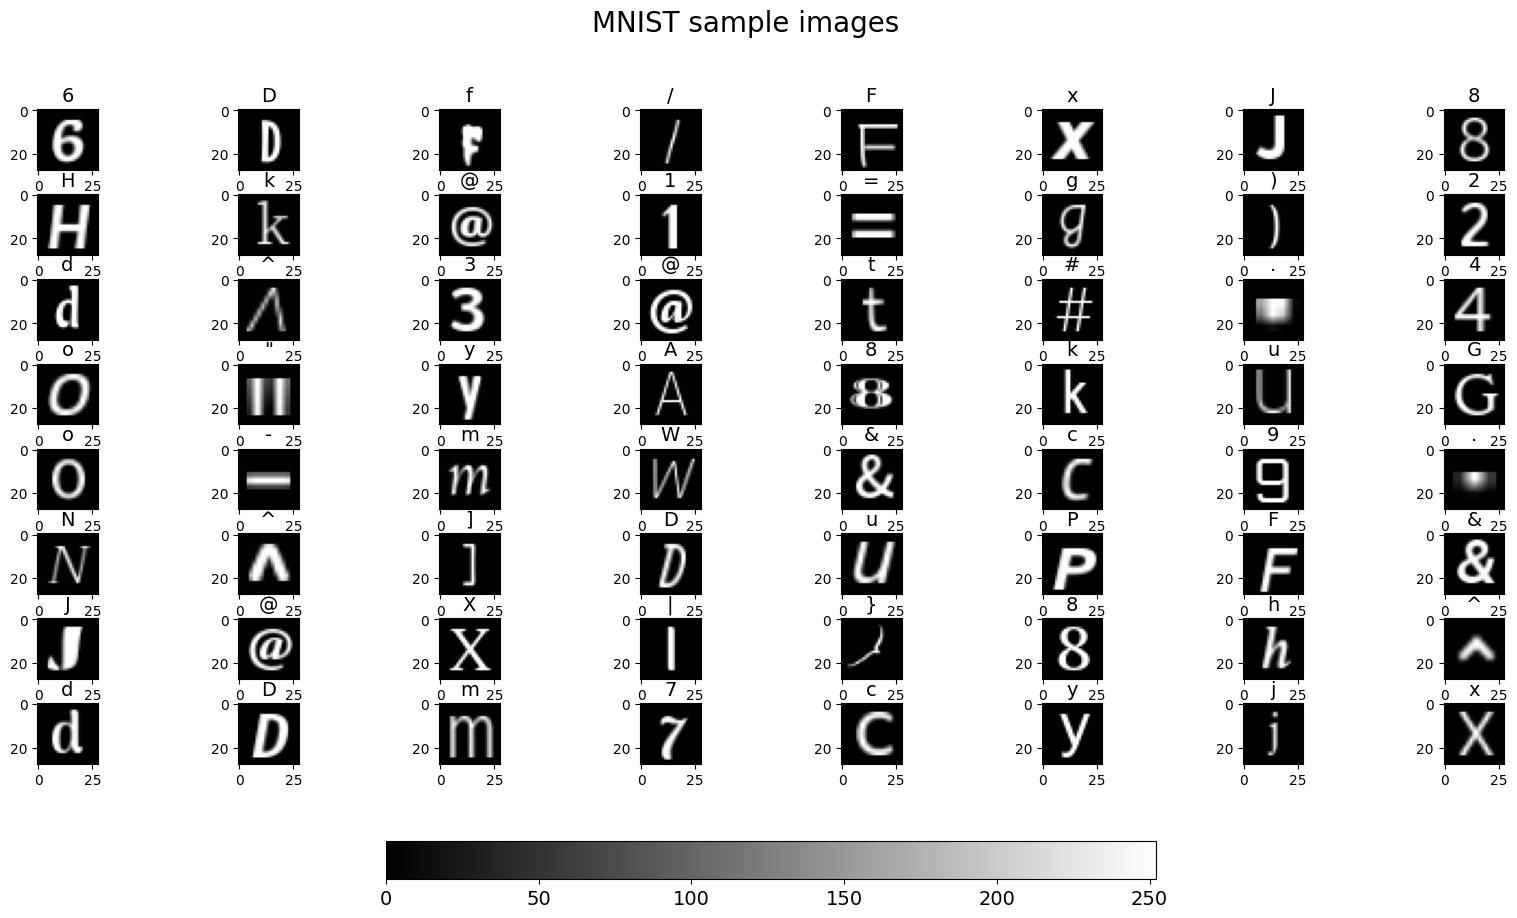

In [5]:
# Assuming the first column ('label') needs to be excluded from X before reshaping
X_pixels = X.iloc[:, 1:]  # This excludes the first column, adjust accordingly if the extra column is not the first one

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20, 10))
fig.suptitle("MNIST sample images", fontsize=20)

for i, ax in enumerate(axes.flat):
    # Use X_pixels for reshaping
    img = ax.imshow(X_pixels.values[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    ax.set_title(str(y.iloc[i]), fontsize=14)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
# Adjusting colorbar creation to be compatible with subplots
cbar = fig.colorbar(img, ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.05, pad=0.1)
cbar.ax.tick_params(labelsize=14)

plt.show()

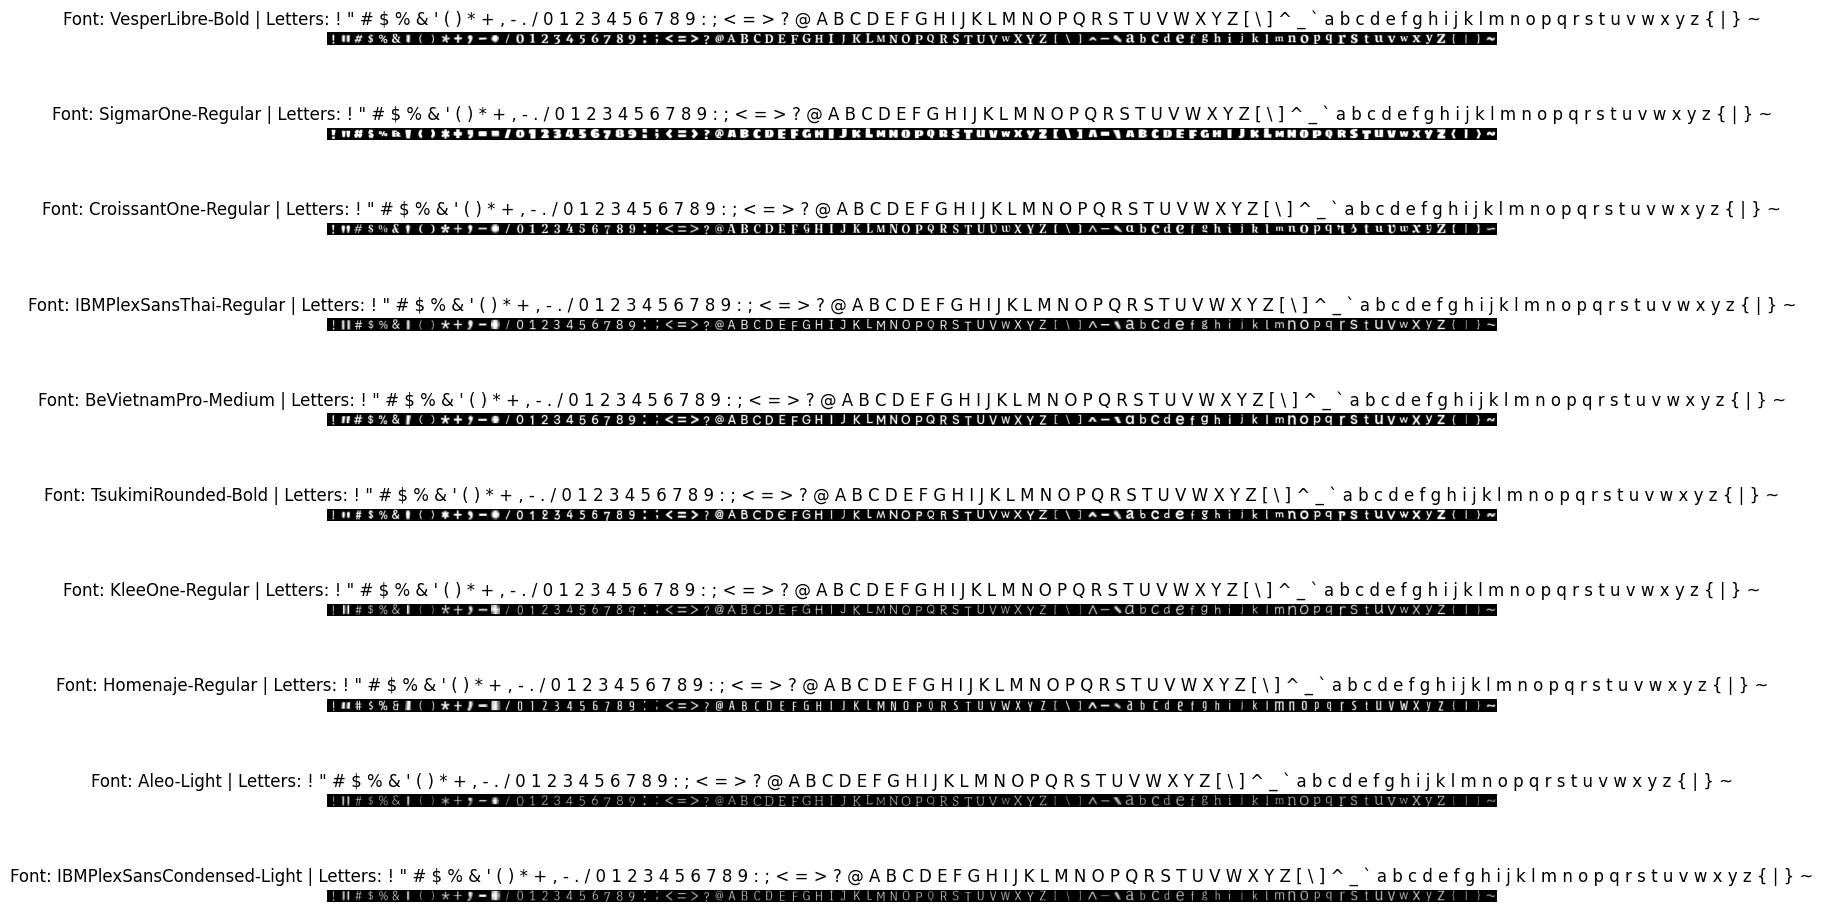

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random, string

random.seed(118)

df = pd.read_csv("./dataset/TMNIST_alphabet.csv")

image_data = df.iloc[:, 2:].values.reshape(-1, 28, 28)
df['image'] = list(image_data)

font_groups = df.groupby("names")

output_images = {}

for font_name, group in font_groups:
    samples = group.drop_duplicates(subset="labels").sort_values(by="labels")
    if len(samples) == 0:
        continue
    images = samples['image'].tolist()
    labels = samples['labels'].tolist()

    canvas = np.ones((28, 28 * len(images))) * 255
    for idx, img in enumerate(images):
        canvas[:, idx*28:(idx+1)*28] = img * 255

    output_images[font_name] = (canvas, labels)

sample_fonts = random.sample(list(output_images.keys()), 10)
fig, axes = plt.subplots(len(sample_fonts), 1, figsize=(12, len(sample_fonts)))

for ax, font in zip(axes, sample_fonts):
    canvas, labels = output_images[font]
    ax.imshow(canvas, cmap='gray')
    ax.set_title(f"Font: {font} | Letters: {' '.join(labels)}")
    ax.axis('off')

plt.tight_layout()
plt.show()

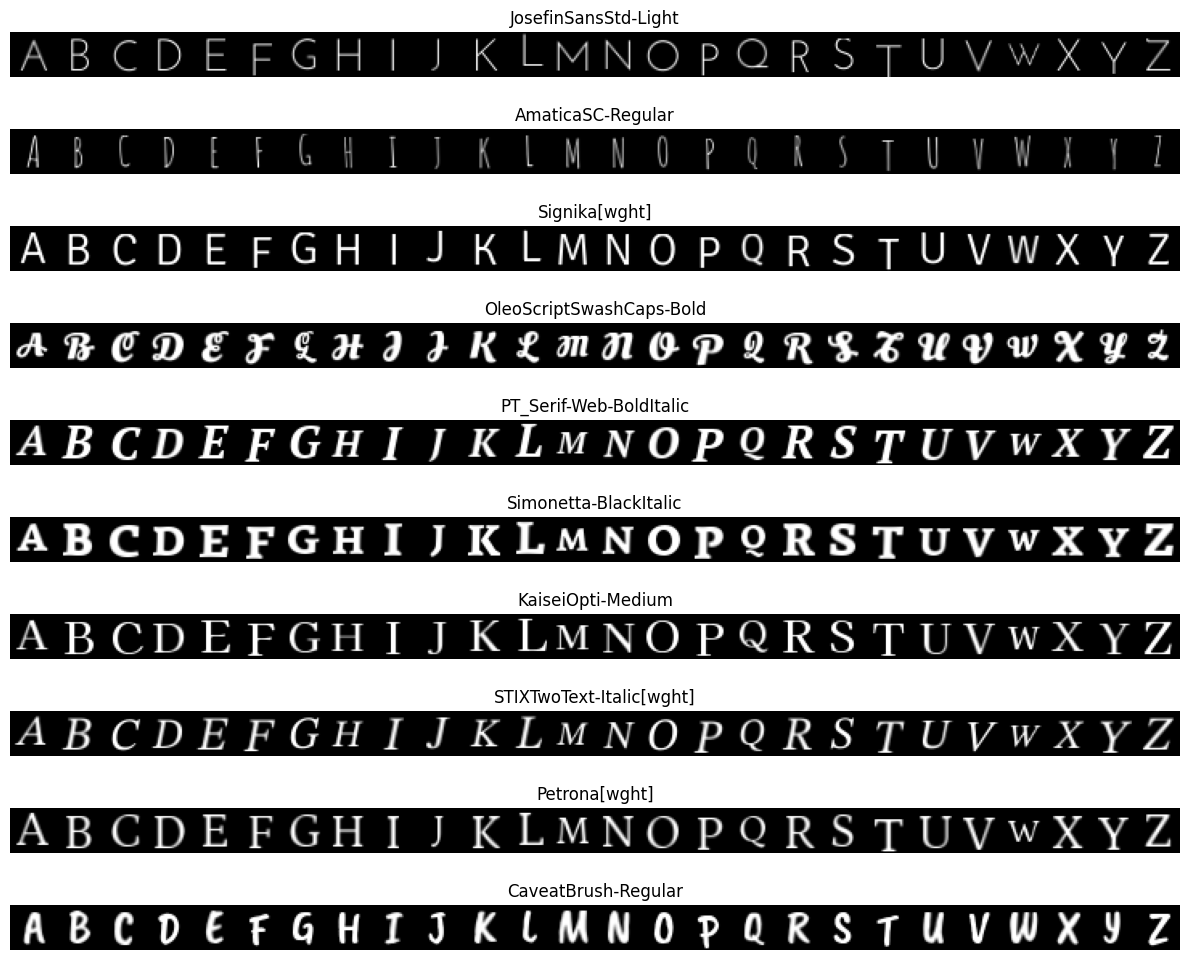

In [7]:
# Only show uppercase letters
uppercase_letters = set(string.ascii_uppercase)
font_groups = df.groupby("names")

output_images_uppercase = {}

for font_name, group in font_groups:
    group_upper = group[group['labels'].isin(uppercase_letters)]
    samples = group_upper.drop_duplicates(subset="labels").sort_values(by="labels")

    if len(samples) == 0:
        continue

    images = samples['image'].tolist()
    labels = samples['labels'].tolist()

    canvas = np.ones((28, 28 * len(images))) * 255
    for idx, img in enumerate(images):
        canvas[:, idx * 28:(idx + 1) * 28] = img * 255

    output_images_uppercase[font_name] = (canvas, labels)
sample_fonts_upper = random.sample(list(output_images_uppercase.keys()), 10)

fig, axes = plt.subplots(len(sample_fonts_upper), 1, figsize=(12, len(sample_fonts_upper)))

for ax, font in zip(axes, sample_fonts_upper):
    canvas, labels = output_images_uppercase[font]
    ax.imshow(canvas, cmap='gray')
    ax.set_title(f"{font}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [8]:
df['image']

0         [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1         [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2         [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3         [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4         [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
                                ...                        
274088    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
274089    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
274090    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
274091    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
274092    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: image, Length: 274093, dtype: object

In [9]:
pixel_columns = [str(i) for i in range(1, 785)]
df_to_pkl = df.drop(columns=pixel_columns)

df_to_pkl.to_pickle('./dataset/TMNIST_alphabet.pkl') 

print(df_to_pkl.head())
print(df_to_pkl.columns)

                  names labels  \
0         Salsa-Regular      6   
1  MouseMemoirs-Regular      D   
2     Creepster-Regular      f   
3     SeoulNamsan-Light      /   
4  HachiMaruPop-Regular      F   

                                               image  
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
3  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
4  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
Index(['names', 'labels', 'image'], dtype='object')
